# Ensembles Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV file into a DataFrame
df = pd.read_csv('rw_data.csv')

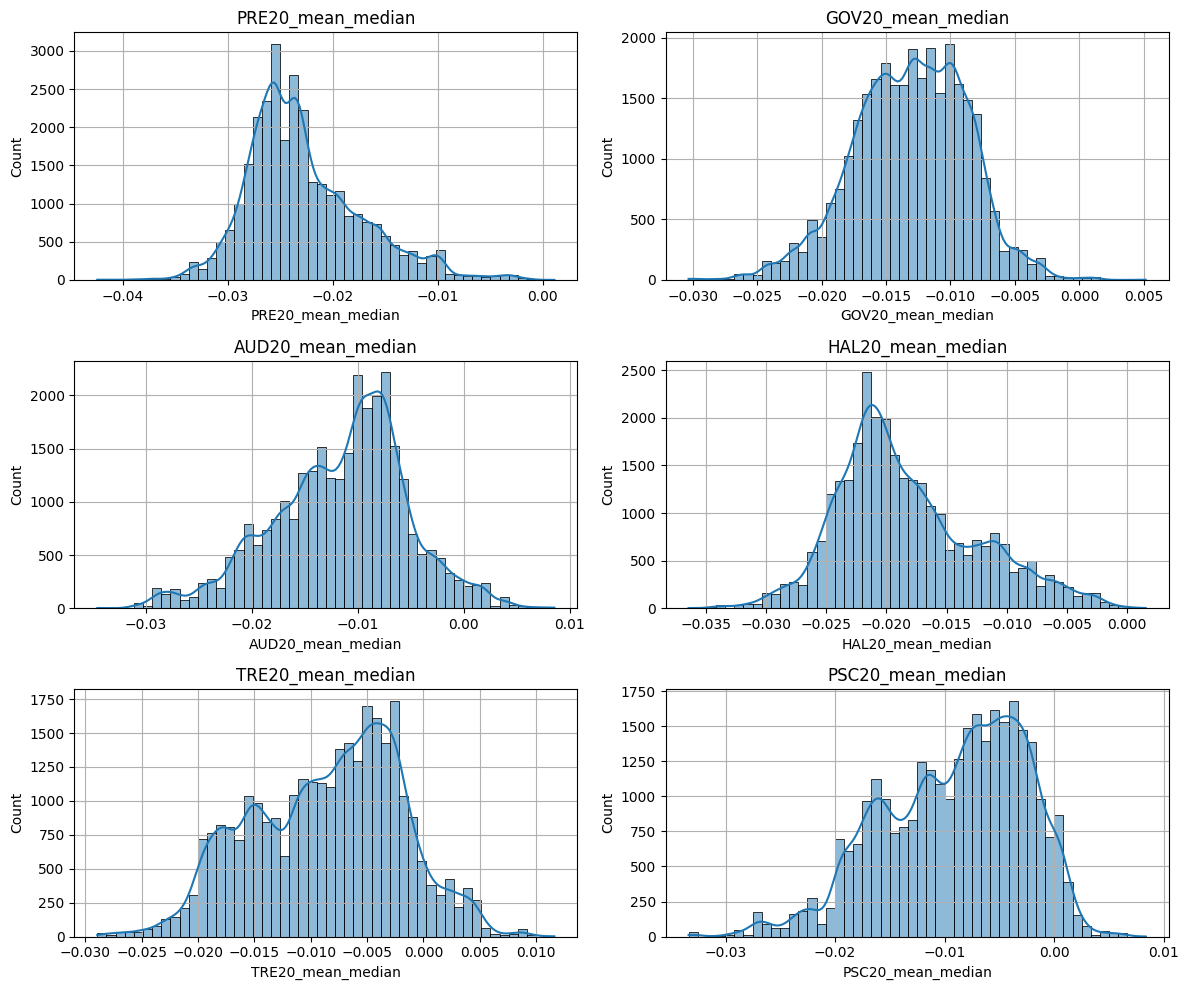

In [3]:
# Draw histograms of "PRE20_mean_median", "GOV20_mean_median", "AUD20_mean_median", "HAL20_mean_median", "TRE20_mean_median", "PSC20_mean_median" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_mean_median', 'GOV20_mean_median', 'AUD20_mean_median', 'HAL20_mean_median', 'TRE20_mean_median', 'PSC20_mean_median']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

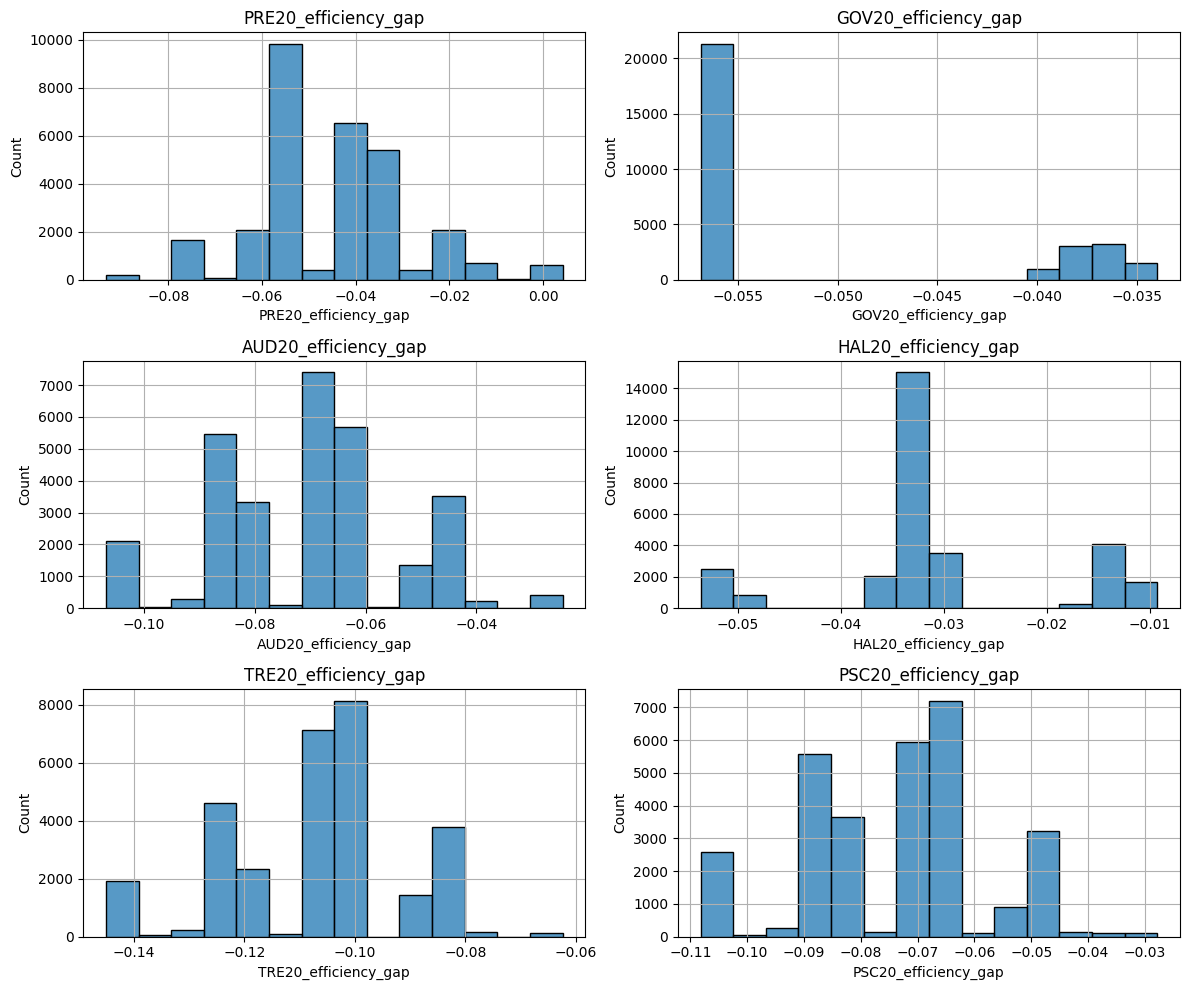

In [4]:
# Draw histograms for "PRE20_efficiency_gap", "GOV20_efficiency_gap", "AUD20_efficiency_gap", "HAL20_efficiency_gap", "TRE20_efficiency_gap", "PSC20_efficiency_gap" columns using Seaborn

columns = ['PRE20_efficiency_gap', 'GOV20_efficiency_gap', 'AUD20_efficiency_gap', 'HAL20_efficiency_gap', 'TRE20_efficiency_gap', 'PSC20_efficiency_gap']

# Create a figure and axes for the grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Iterate over the columns and plot the histograms
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], bins=14, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

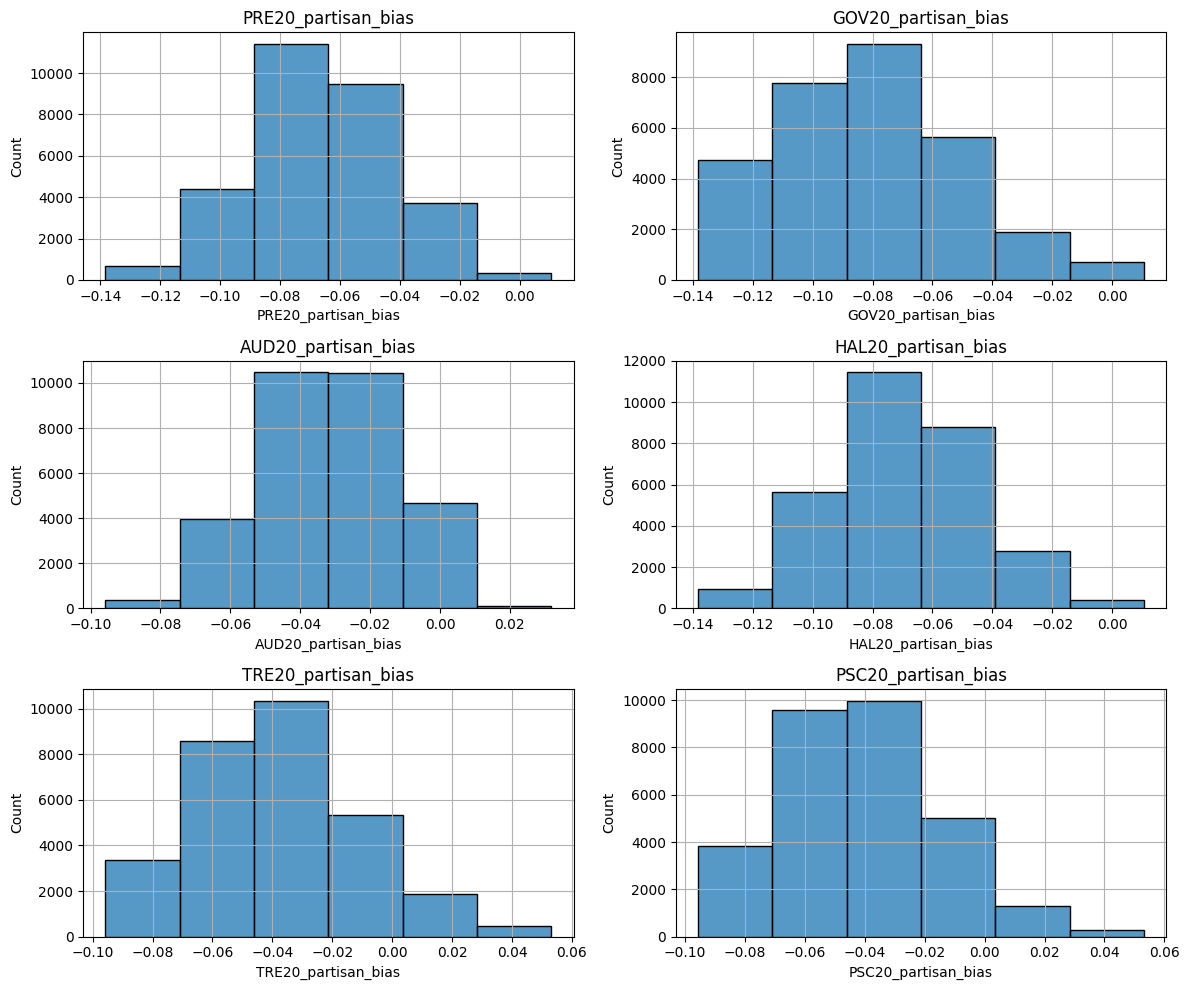

In [5]:
# Draw histograms for "PRE20_partisan_bias", "GOV20_partisan_bias", "AUD20_partisan_bias", "HAL20_partisan_bias", "TRE20_partisan_bias", "PSC20_partisan_bias" columns using Seaborn

columns = ['PRE20_partisan_bias', 'GOV20_partisan_bias', 'AUD20_partisan_bias', 'HAL20_partisan_bias', 'TRE20_partisan_bias', 'PSC20_partisan_bias']

# Create a figure and axes for the grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Iterate over the columns and plot the histograms
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], bins=6, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

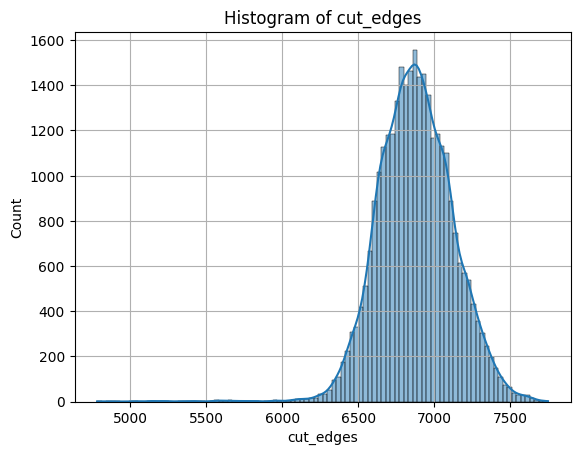

In [6]:
# Draw histograms for "cut_edges" column using Seaborn
sns.histplot(df['cut_edges'], bins=100, kde=True)
plt.title('Histogram of cut_edges')
plt.grid(True)
plt.show()

In [7]:
nat_maj_df = pd.DataFrame()
nat_vap_maj_df = pd.DataFrame()
for i in range (1, 48):
    pop_col = f'population_{i}'
    vap_col = f'voting age population_{i}'
    native_pop_col = f'native population_{i}'
    vap_native_pop_col = f'native voting age population_{i}'

    nat_maj_df[i] = df[native_pop_col] > df[pop_col]*0.5
    nat_vap_maj_df[i] = df[vap_native_pop_col] > df[vap_col]*0.5

nat_maj_df['Maj Native American Dist'] = nat_maj_df.sum(axis=1)
nat_vap_maj_df['Maj VAP Native American Dist'] = nat_vap_maj_df.sum(axis=1)

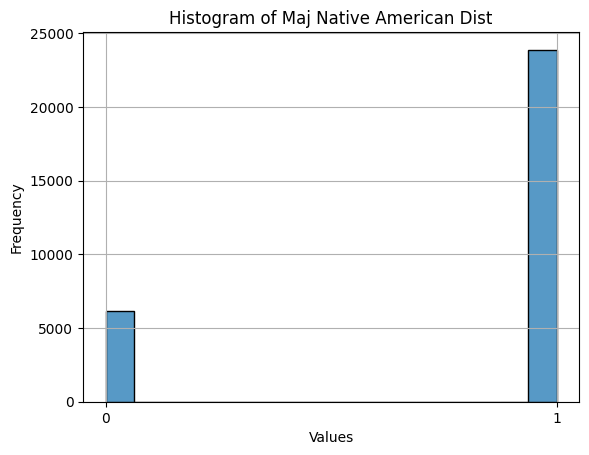

In [8]:
sns.histplot(data=nat_maj_df, x='Maj Native American Dist', kde=False)

# Set labels and title
plt.xticks(range(0, 2, 1))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Maj Native American Dist')
plt.grid(True)

# Display the plot
plt.show()

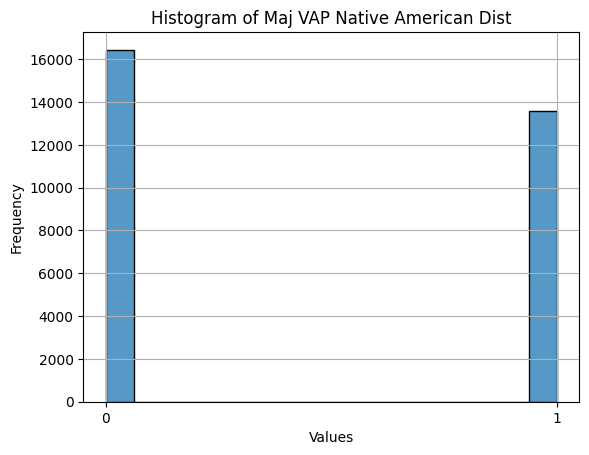

In [9]:
# Plot a histogram of the 'Maj VAP Native American Dist' column
sns.histplot(data=nat_vap_maj_df, x='Maj VAP Native American Dist', kde=False)

# Set labels and title
plt.xticks(range(0, 2, 1))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Maj VAP Native American Dist')
plt.grid(True)

# Display the plot
plt.show()

In [10]:
agg_win_df = pd.DataFrame()
for election in ["PRE20", "GOV20", "AUD20", "HAL20", "TRE20", "PSC20"]:
    election_dem_win_df = pd.DataFrame()
    election_rep_win_df = pd.DataFrame()
    for i in range (1, 48):
        pres_dem_col = f'{election}_Democratic_{i}'
        pres_rep_col = f'{election}_Republican_{i}'
    
        election_dem_win_df[i] = df[pres_dem_col] > df[pres_rep_col]
        election_rep_win_df[i] = df[pres_rep_col] > df[pres_dem_col]
    
    agg_win_df[f'{election}_Democratic Win Districts'] = election_dem_win_df.sum(axis=1)
    agg_win_df[f'{election}_Republican Win Districts'] = election_rep_win_df.sum(axis=1)

In [11]:
# print the unique values in all columns of agg_win_df
for col in agg_win_df.columns:
    print(f'{col}: {agg_win_df[col].unique()}')

PRE20_Democratic Win Districts: [6 5 7 4 8 3]
PRE20_Republican Win Districts: [41 42 40 43 39 44]
GOV20_Democratic Win Districts: [1 0]
GOV20_Republican Win Districts: [46 47]
AUD20_Democratic Win Districts: [4 3 2 5 6]
AUD20_Republican Win Districts: [43 44 45 42 41]
HAL20_Democratic Win Districts: [3 2 1]
HAL20_Republican Win Districts: [44 45 46]
TRE20_Democratic Win Districts: [4 3 2 5 6]
TRE20_Republican Win Districts: [43 44 45 42 41]
PSC20_Democratic Win Districts: [4 3 2 5 6]
PSC20_Republican Win Districts: [43 44 45 42 41]


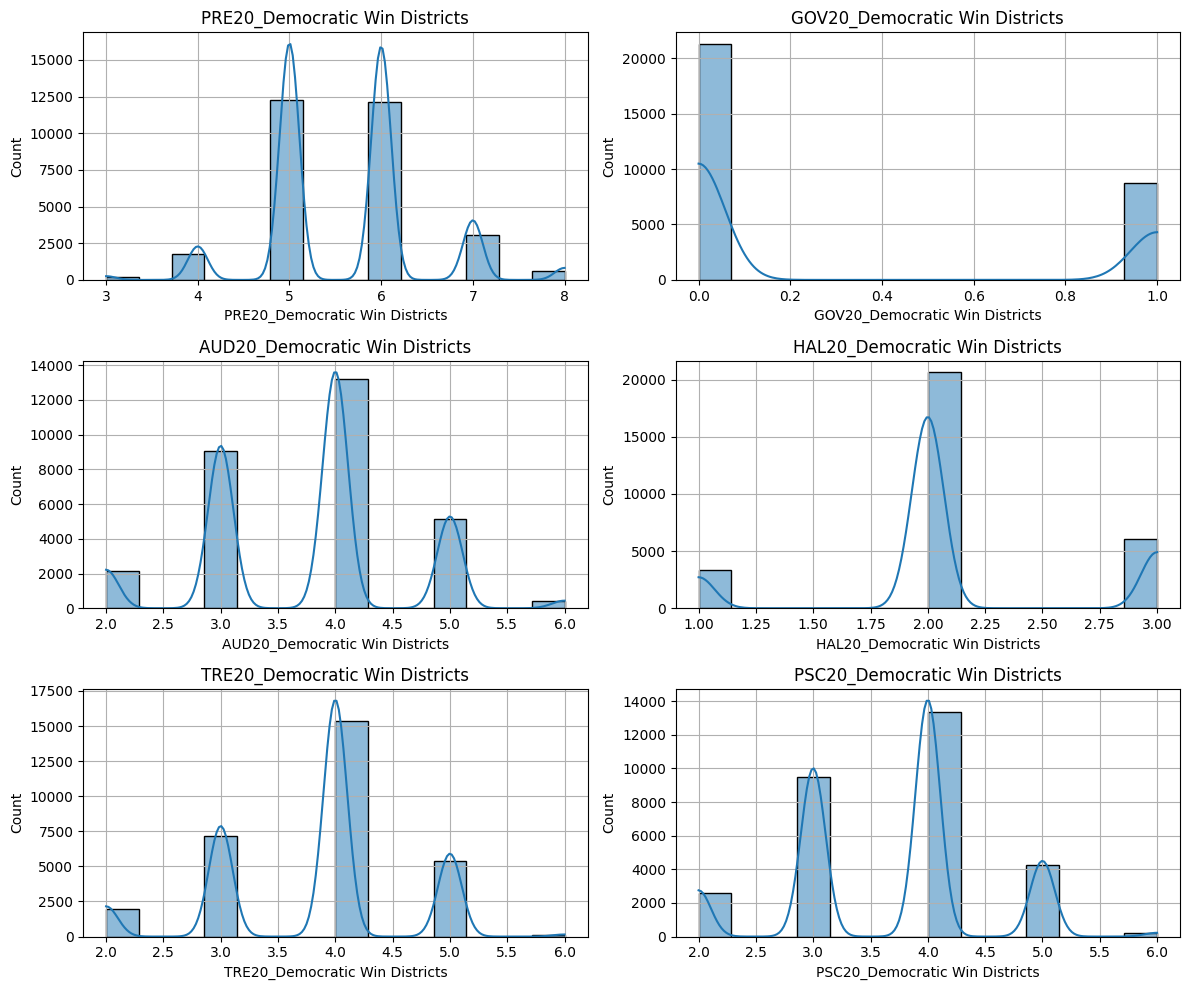

In [12]:
# Draw histograms for "PRE20_Democratic Win Districts", "GOV20_Democratic Win Districts", "AUD20_Democratic Win Districts", "HAL20_Democratic Win Districts", "TRE20_Democratic Win Districts", "PSC20_Democratic Win Districts" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_Democratic Win Districts', 'GOV20_Democratic Win Districts', 'AUD20_Democratic Win Districts', 'HAL20_Democratic Win Districts', 'TRE20_Democratic Win Districts', 'PSC20_Democratic Win Districts']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(agg_win_df[column], bins=14, ax=axes[row, col], kde=True)
    axes[row, col].set_title(column)
    axes[row, col].grid(True)

plt.tight_layout()

plt.show()

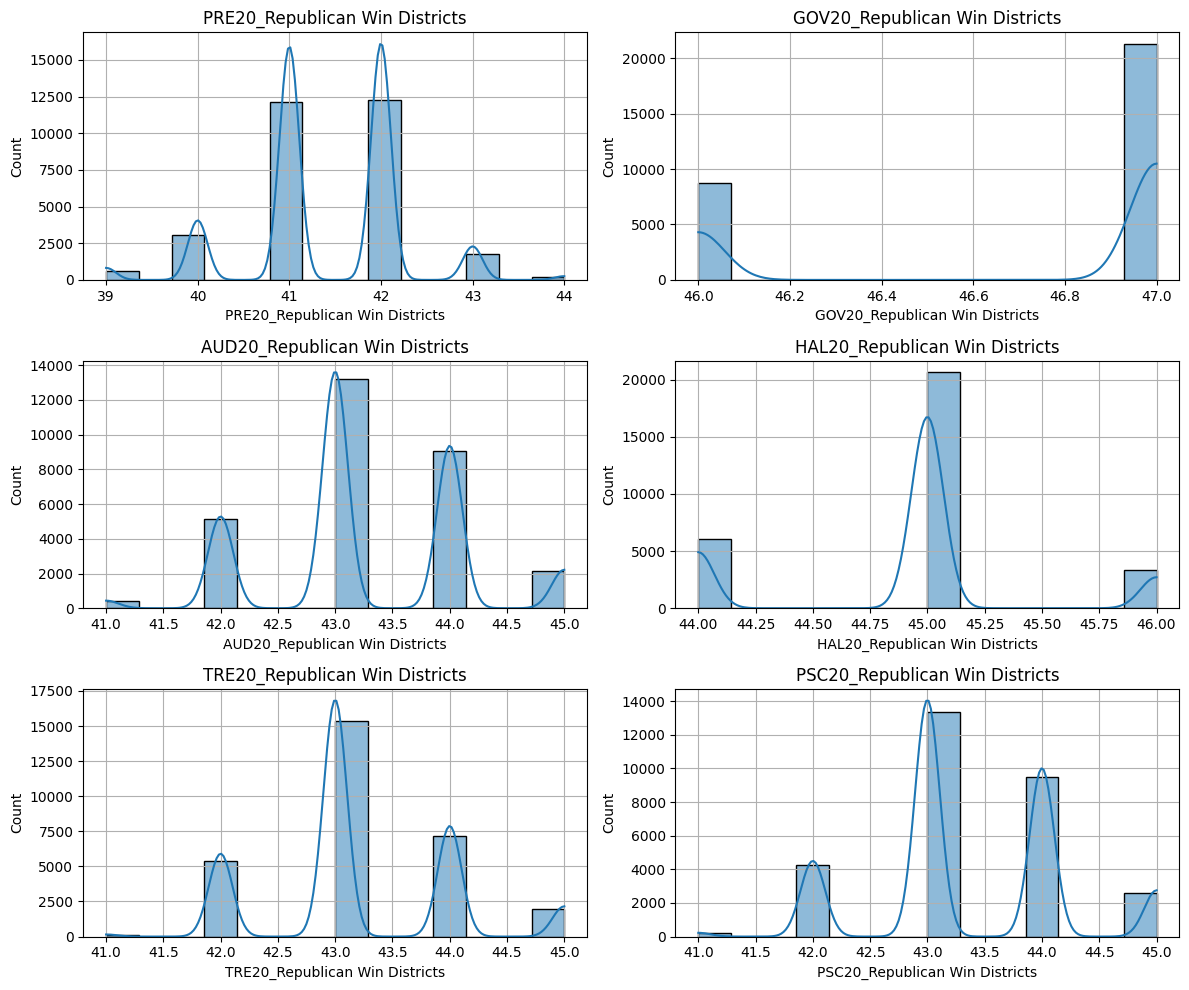

In [13]:
# Draw histograms for "PRE20_Republican Win Districts", "GOV20_Republican Win Districts", "AUD20_Republican Win Districts", "HAL20_Republican Win Districts", "TRE20_Republican Win Districts", "PSC20_Republican Win Districts" columns using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

columns = ['PRE20_Republican Win Districts', 'GOV20_Republican Win Districts', 'AUD20_Republican Win Districts', 'HAL20_Republican Win Districts', 'TRE20_Republican Win Districts', 'PSC20_Republican Win Districts']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(agg_win_df[column], bins=14, ax=axes[row, col], kde=True)
    axes[row, col].set_title(column)
    axes[row, col].grid(True)

plt.tight_layout()

plt.show()

### Signature of Gerrymandering

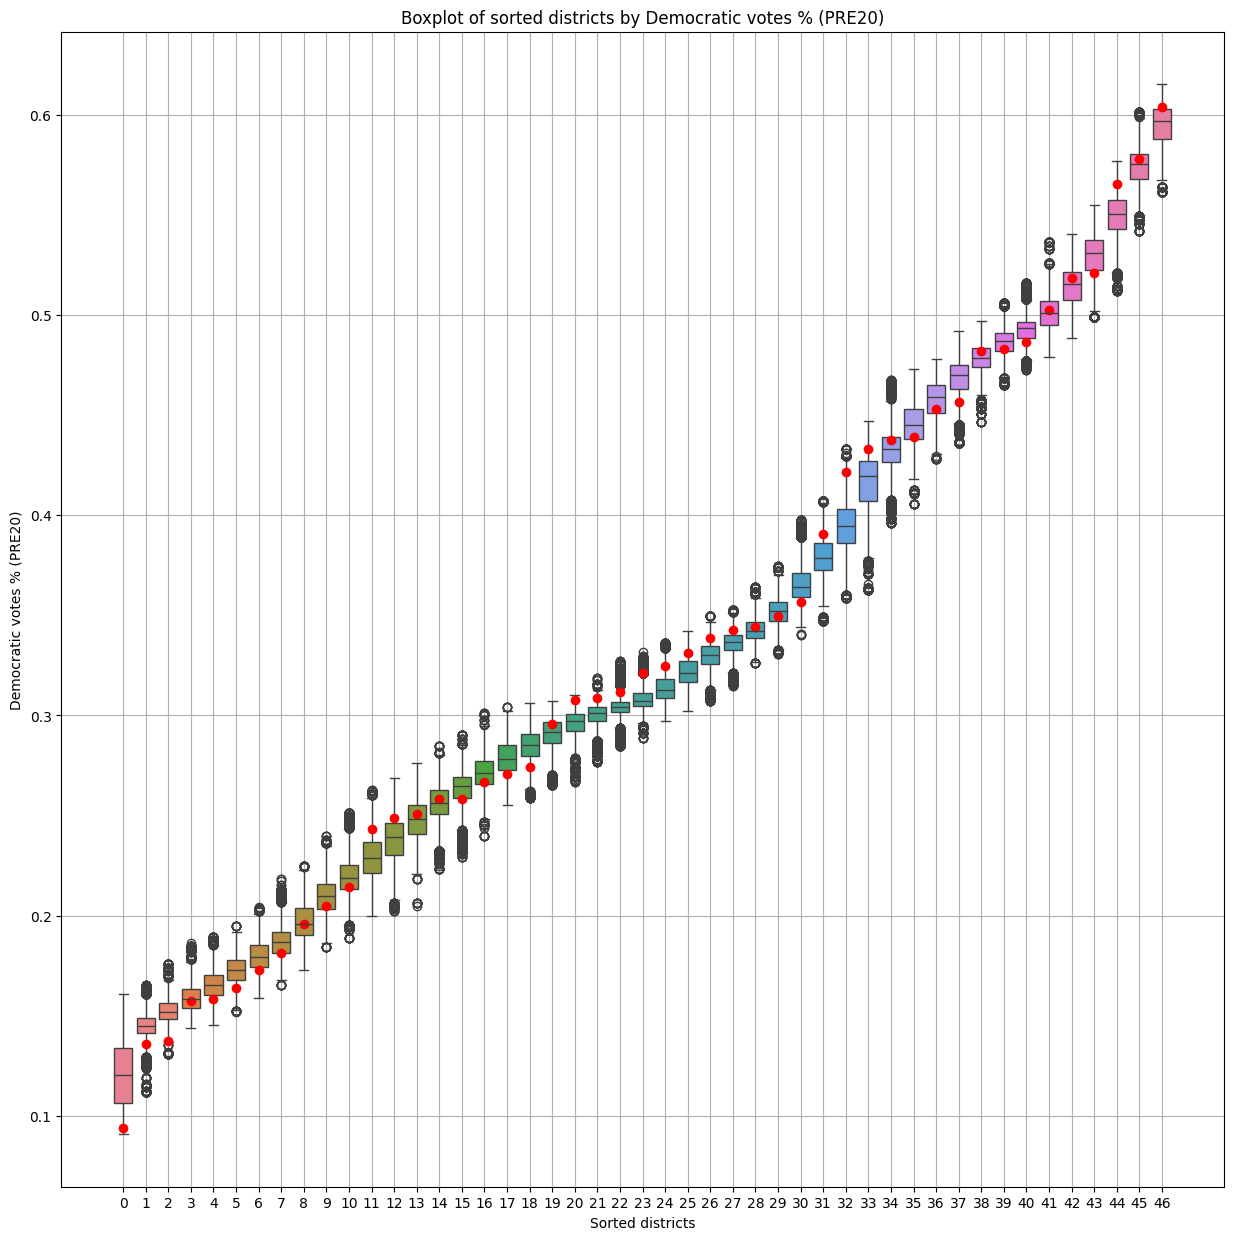

In [14]:
dem_election_votes_cols = [f'PRE20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'PRE20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (PRE20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (PRE20)')
ax.grid(True)

# Display the plot
plt.show()

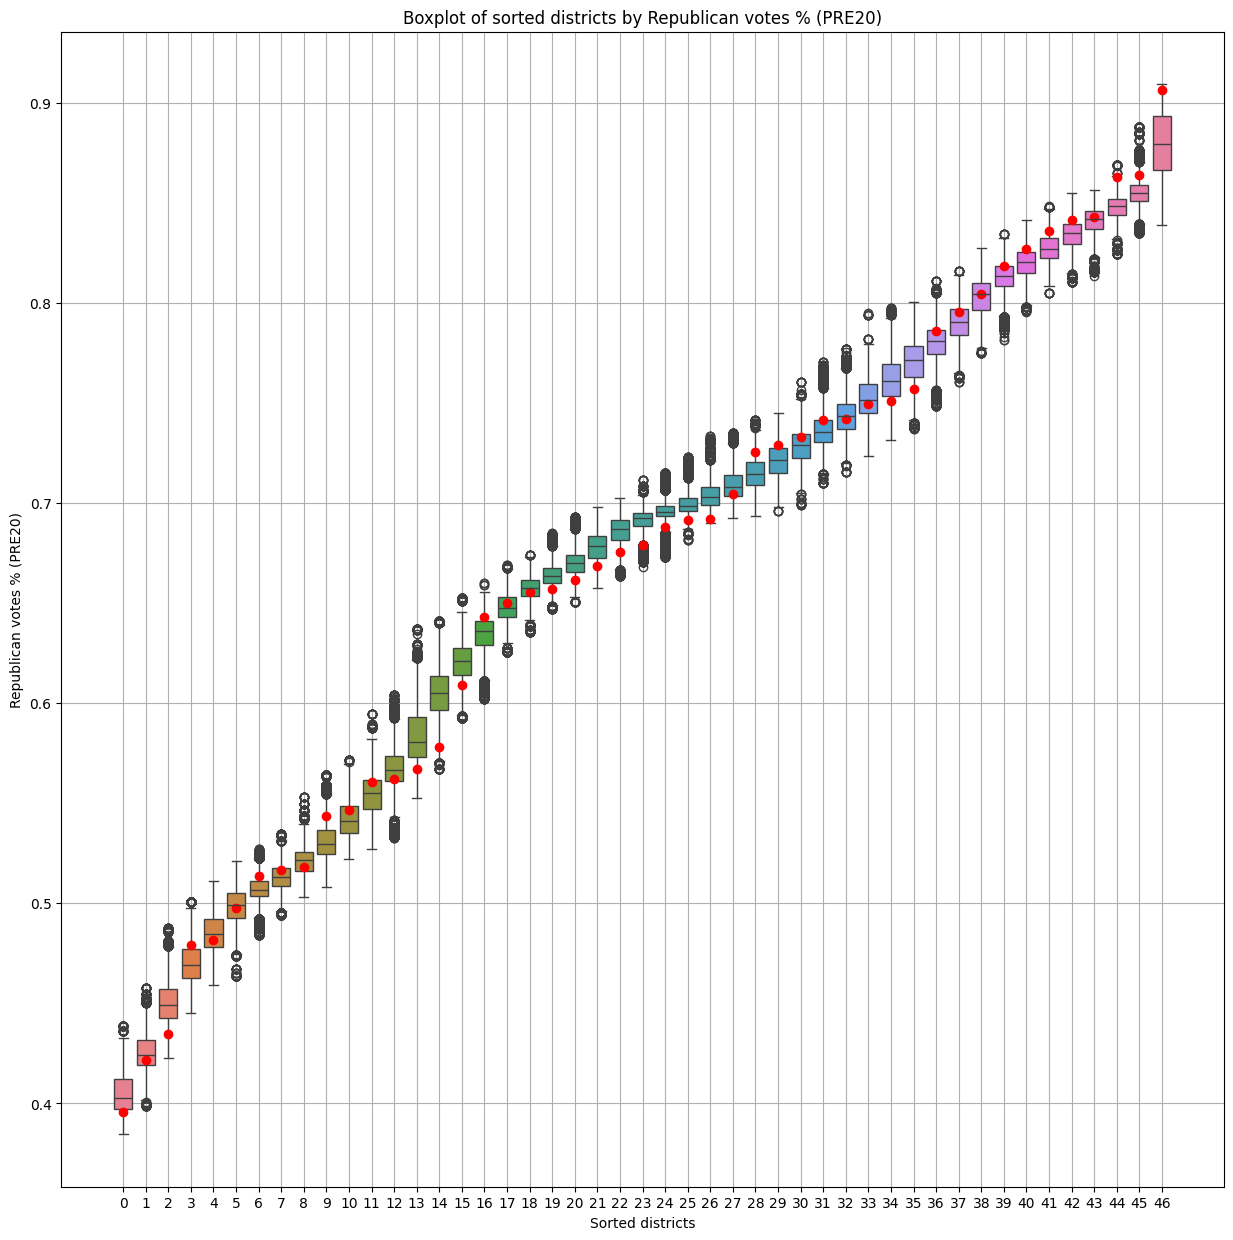

In [15]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (PRE20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (PRE20)')
ax.grid(True)

# Display the plot
plt.show()

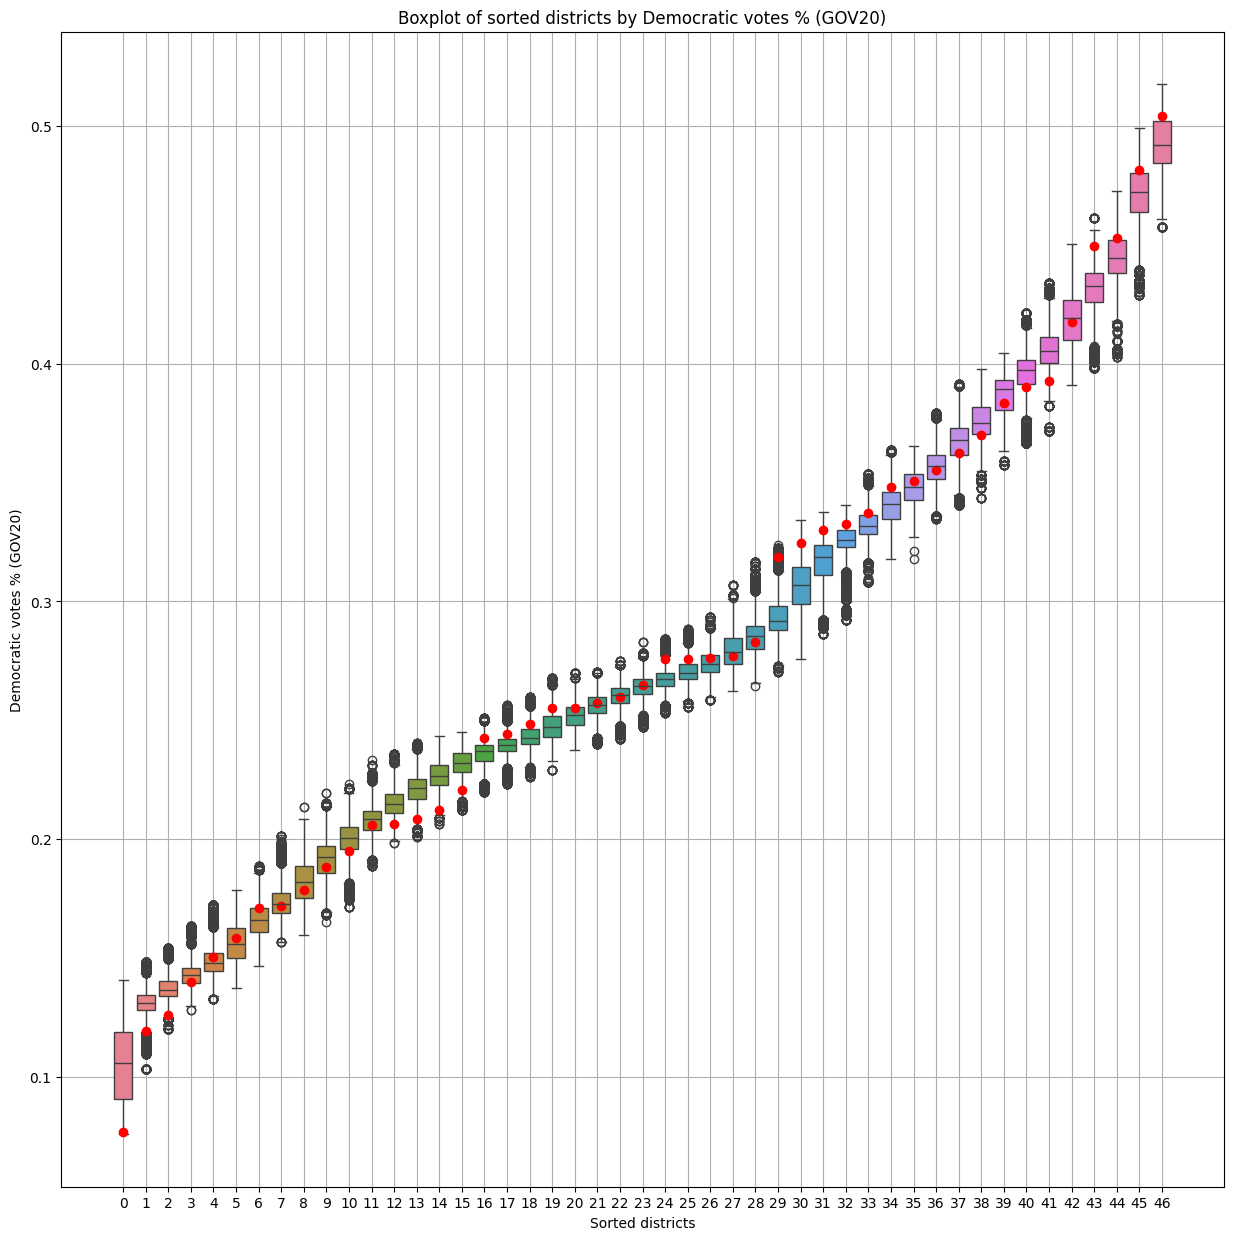

In [16]:
dem_election_votes_cols = [f'GOV20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'GOV20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (GOV20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (GOV20)')
ax.grid(True)

# Display the plot
plt.show()

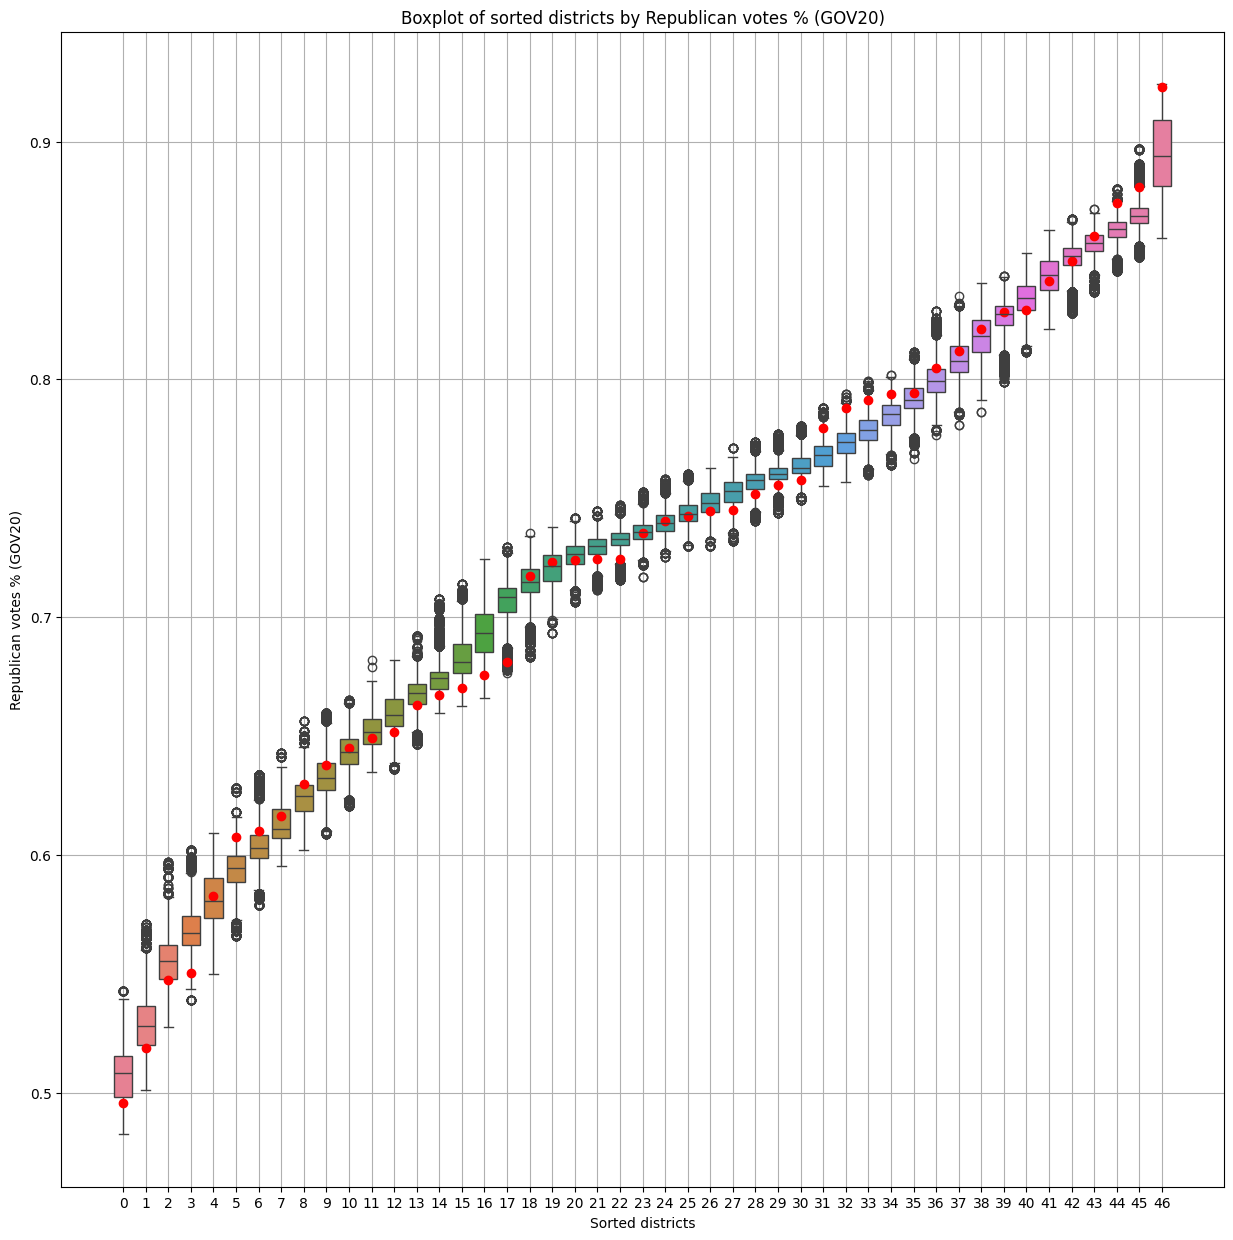

In [17]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (GOV20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (GOV20)')
ax.grid(True)

# Display the plot
plt.show()

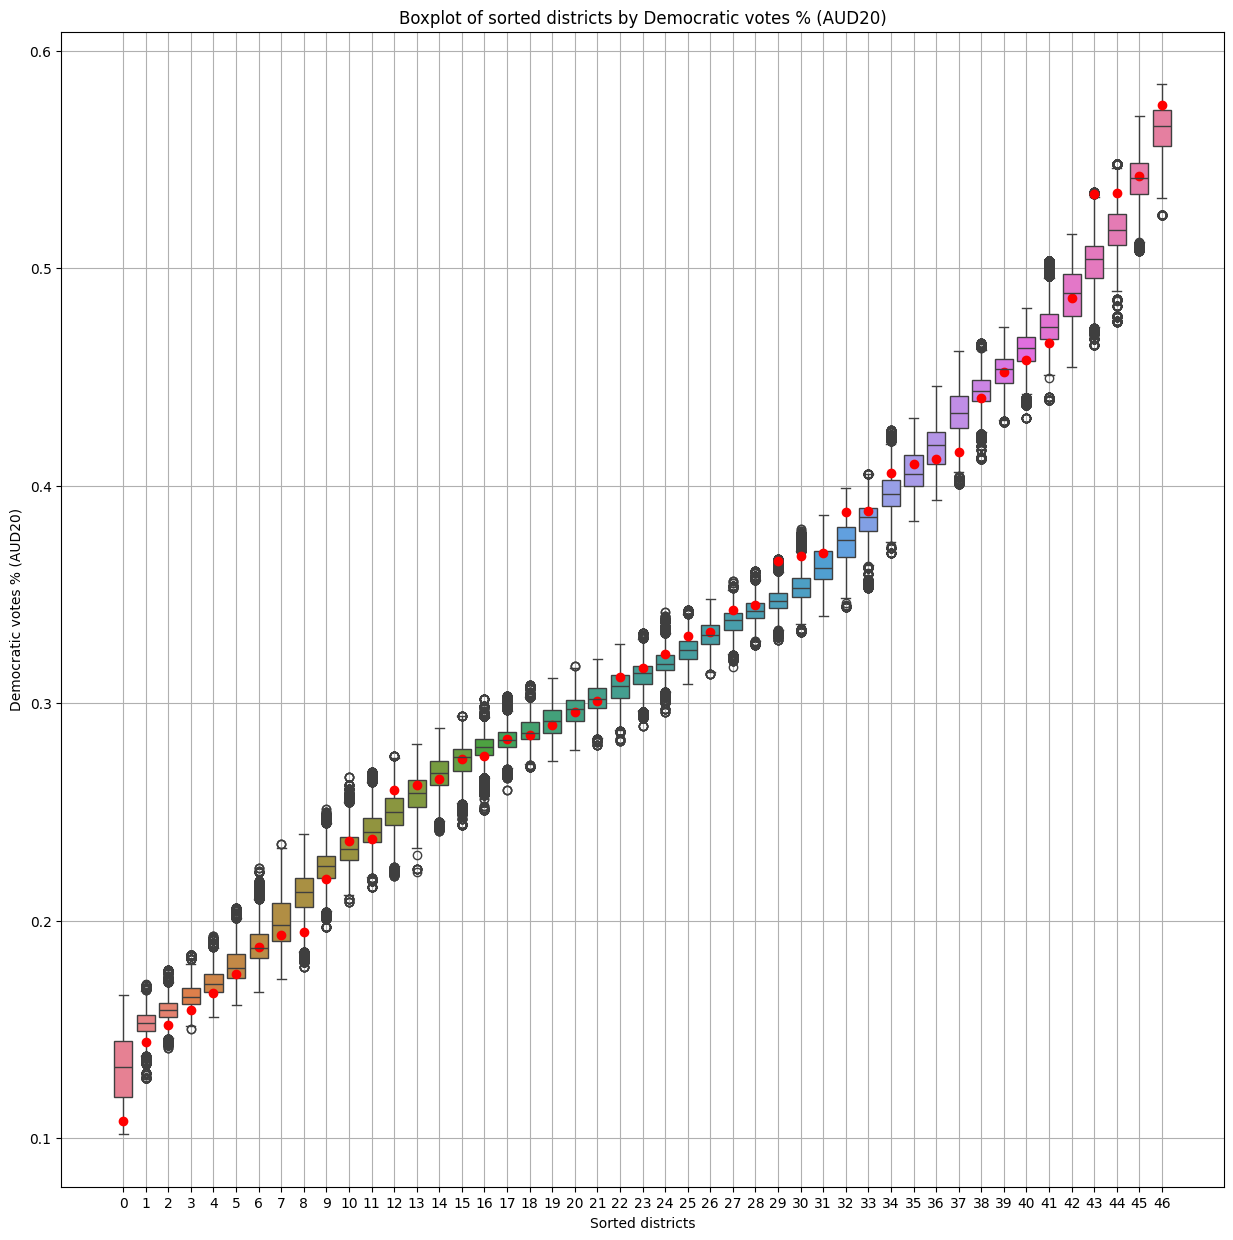

In [18]:
dem_election_votes_cols = [f'AUD20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'AUD20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (AUD20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (AUD20)')
ax.grid(True)

# Display the plot
plt.show()

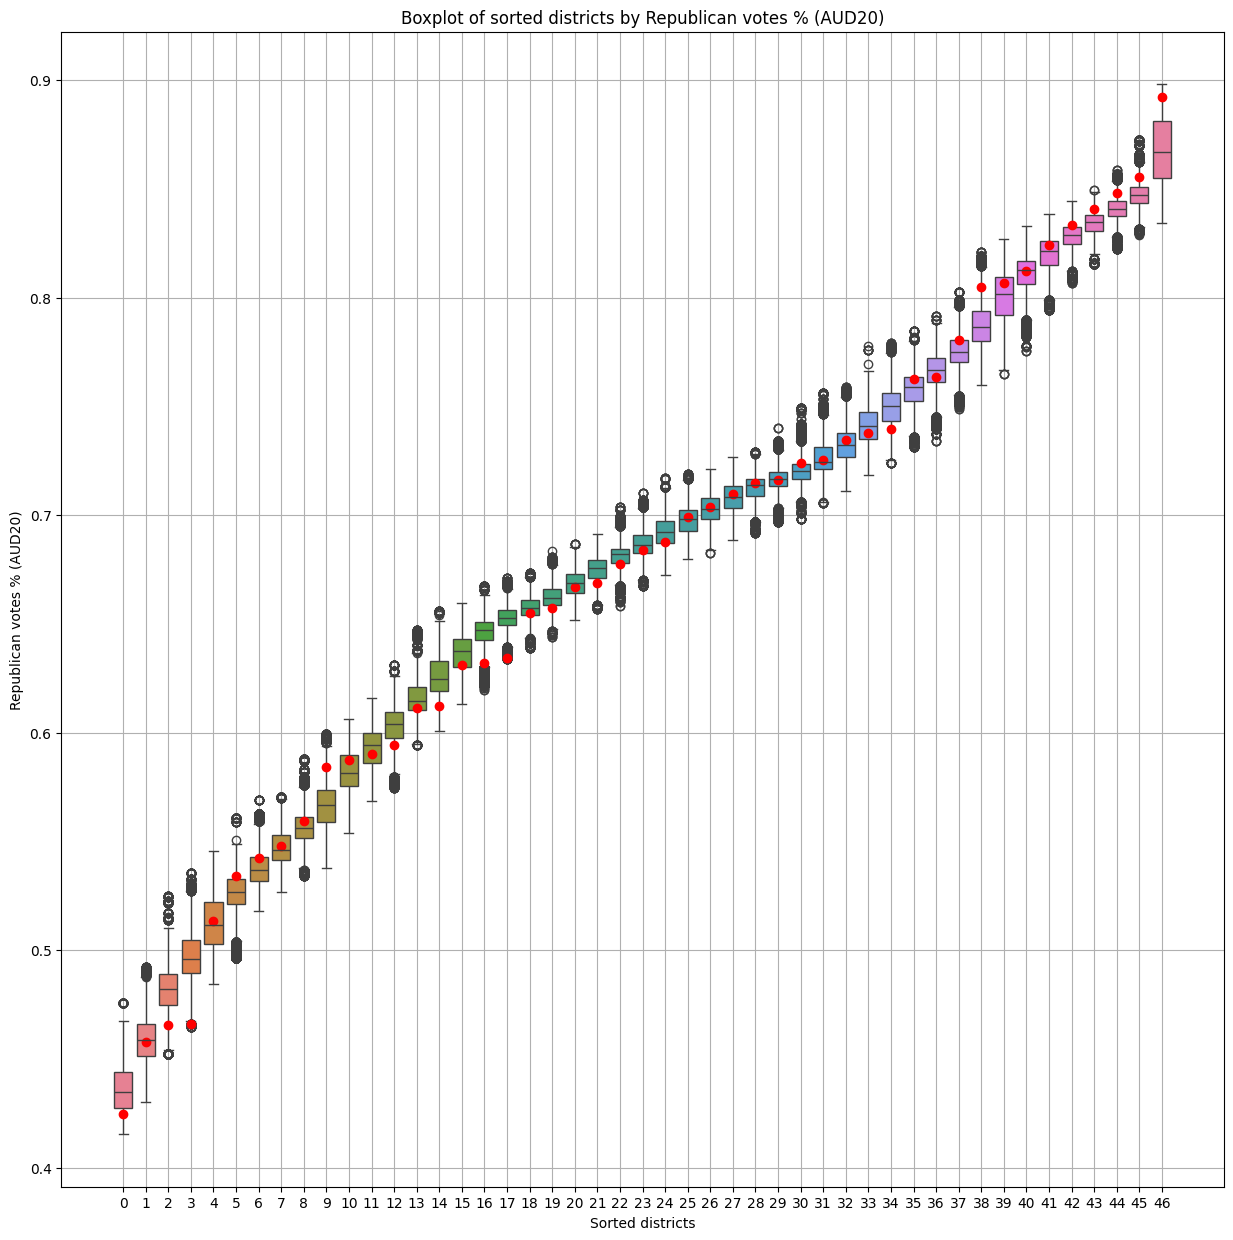

In [19]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (AUD20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (AUD20)')
ax.grid(True)

# Display the plot
plt.show()

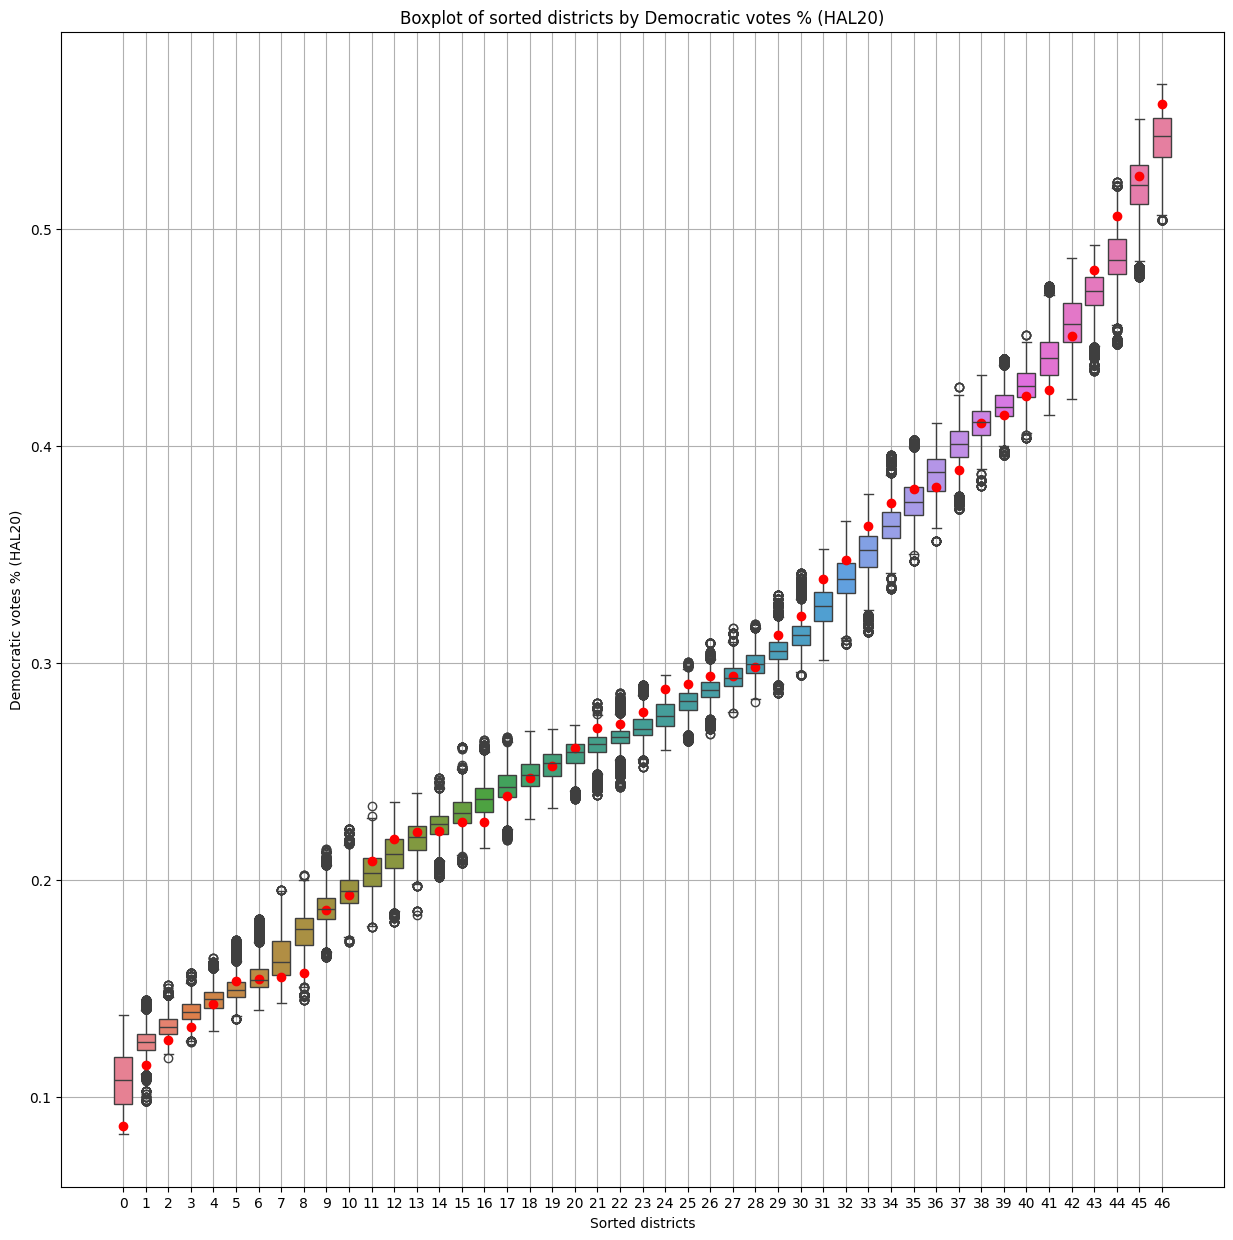

In [20]:
dem_election_votes_cols = [f'HAL20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'HAL20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (HAL20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (HAL20)')
ax.grid(True)

# Display the plot
plt.show()

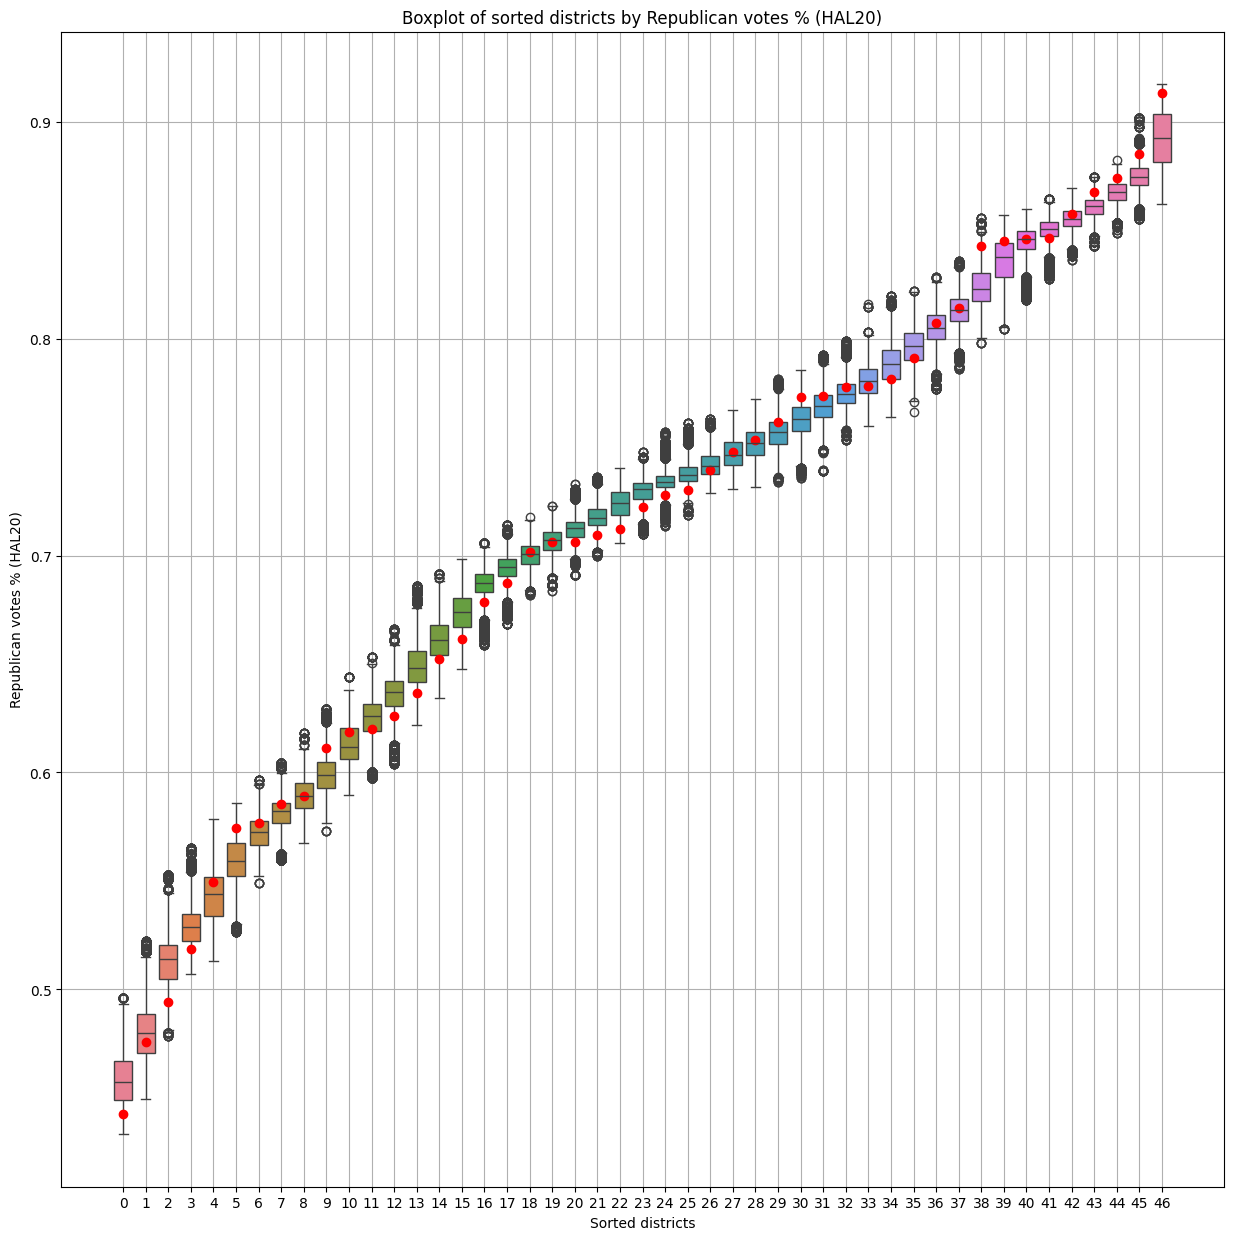

In [21]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (HAL20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (HAL20)')
ax.grid(True)

# Display the plot
plt.show()

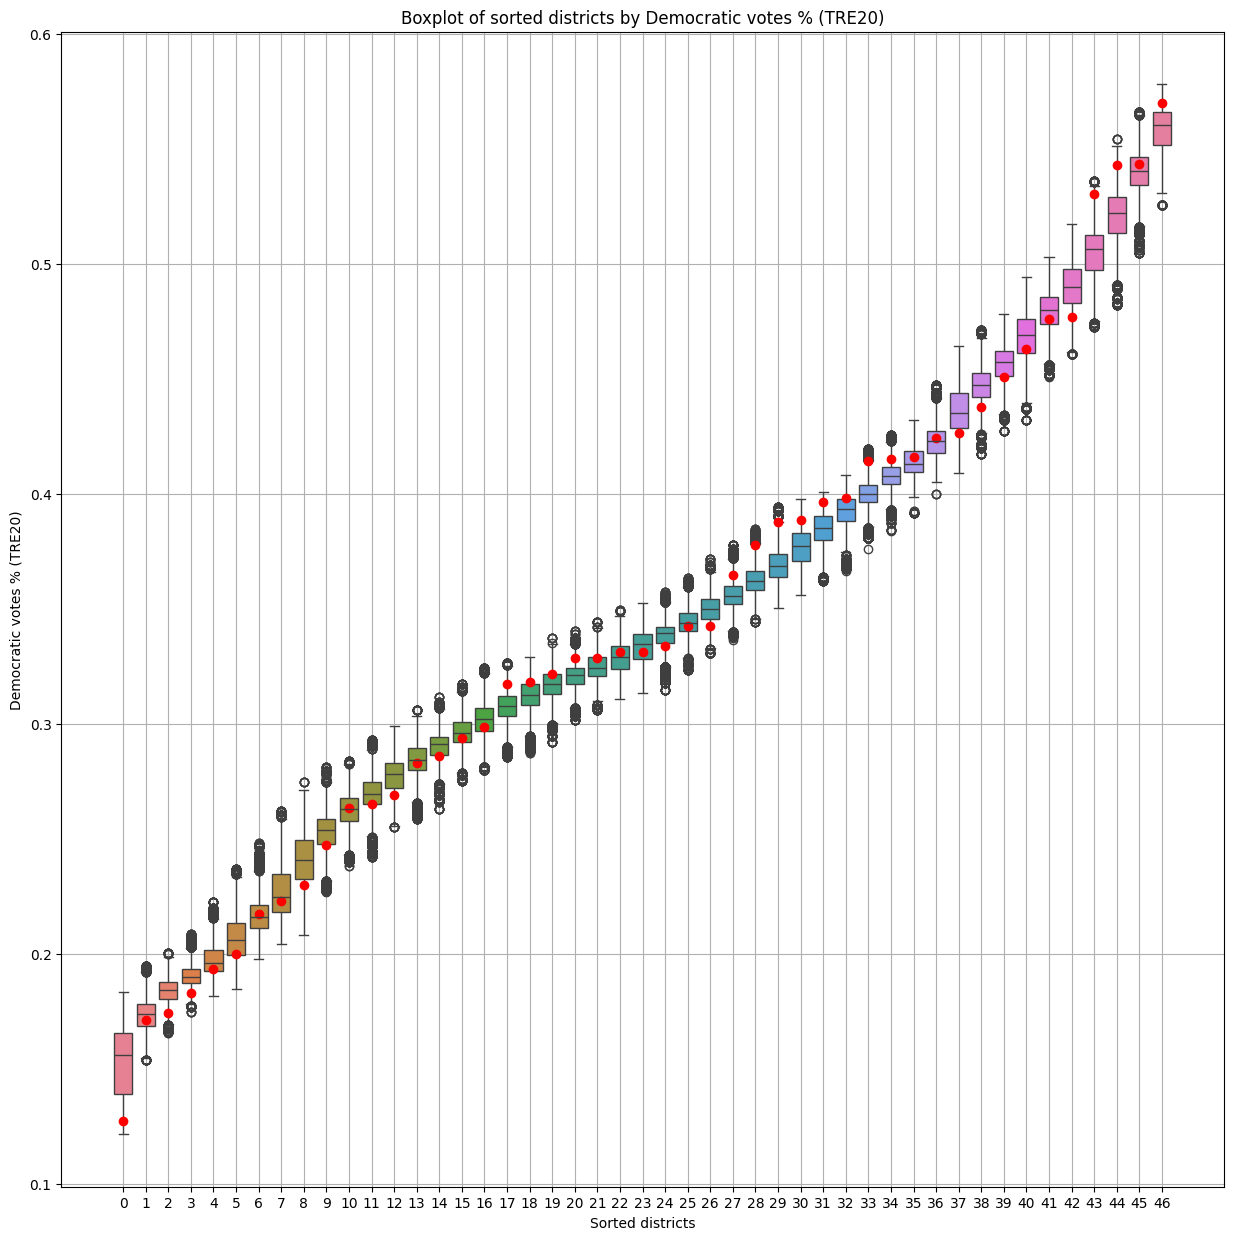

In [22]:
dem_election_votes_cols = [f'TRE20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'TRE20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (TRE20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (TRE20)')
ax.grid(True)

# Display the plot
plt.show()

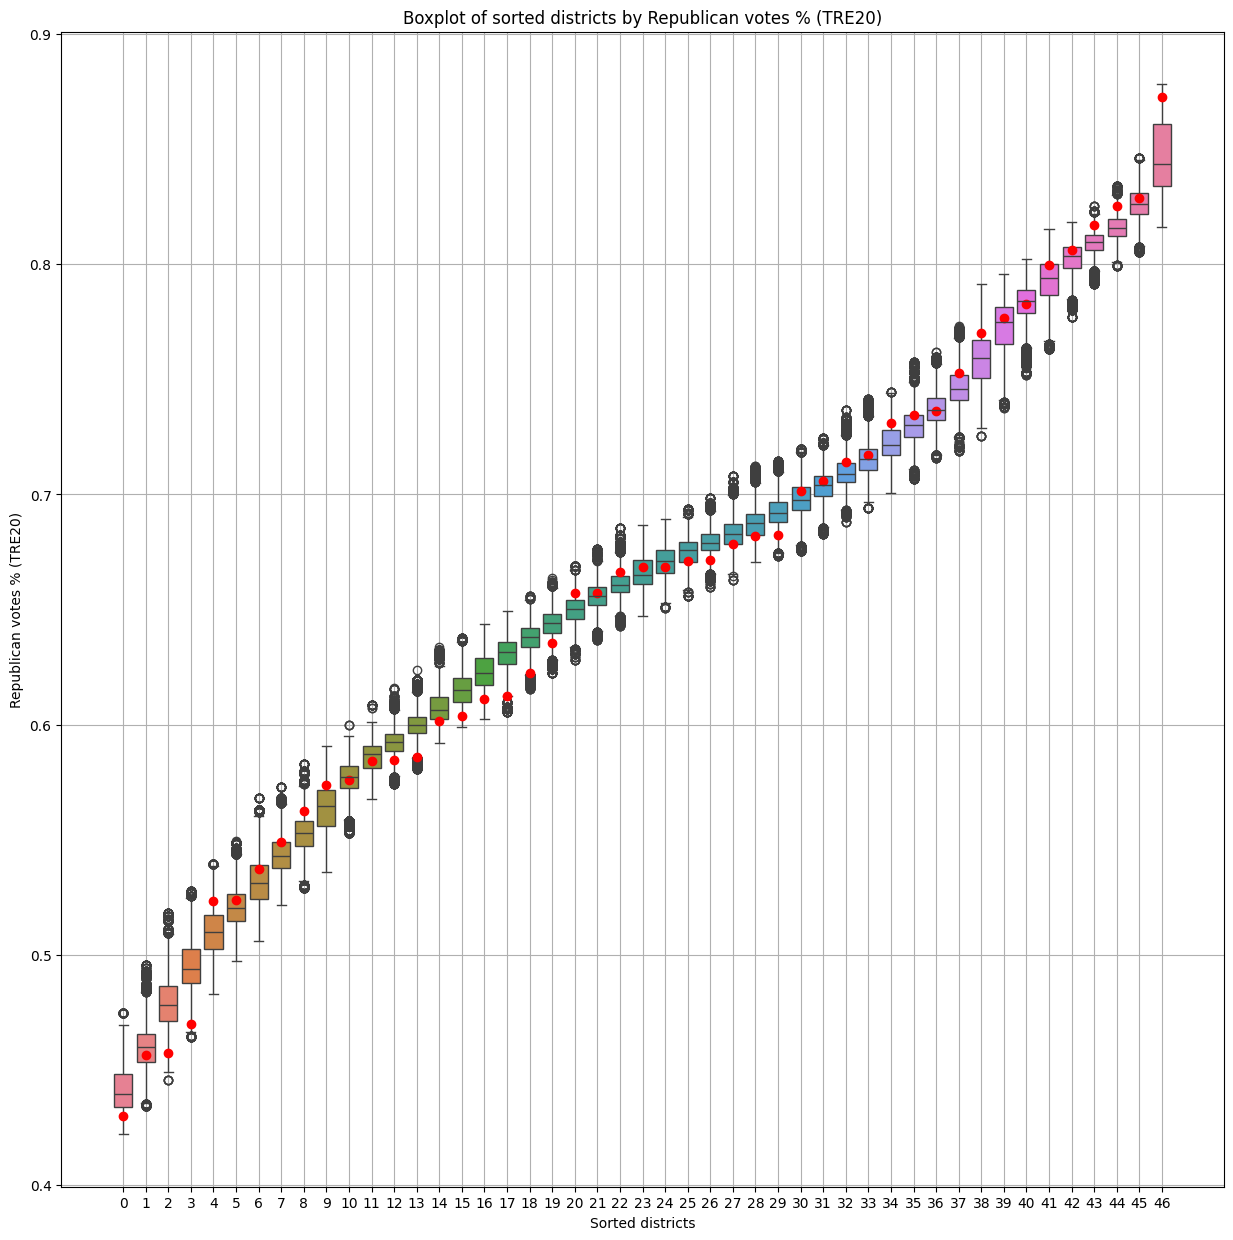

In [23]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (TRE20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (TRE20)')
ax.grid(True)

# Display the plot
plt.show()

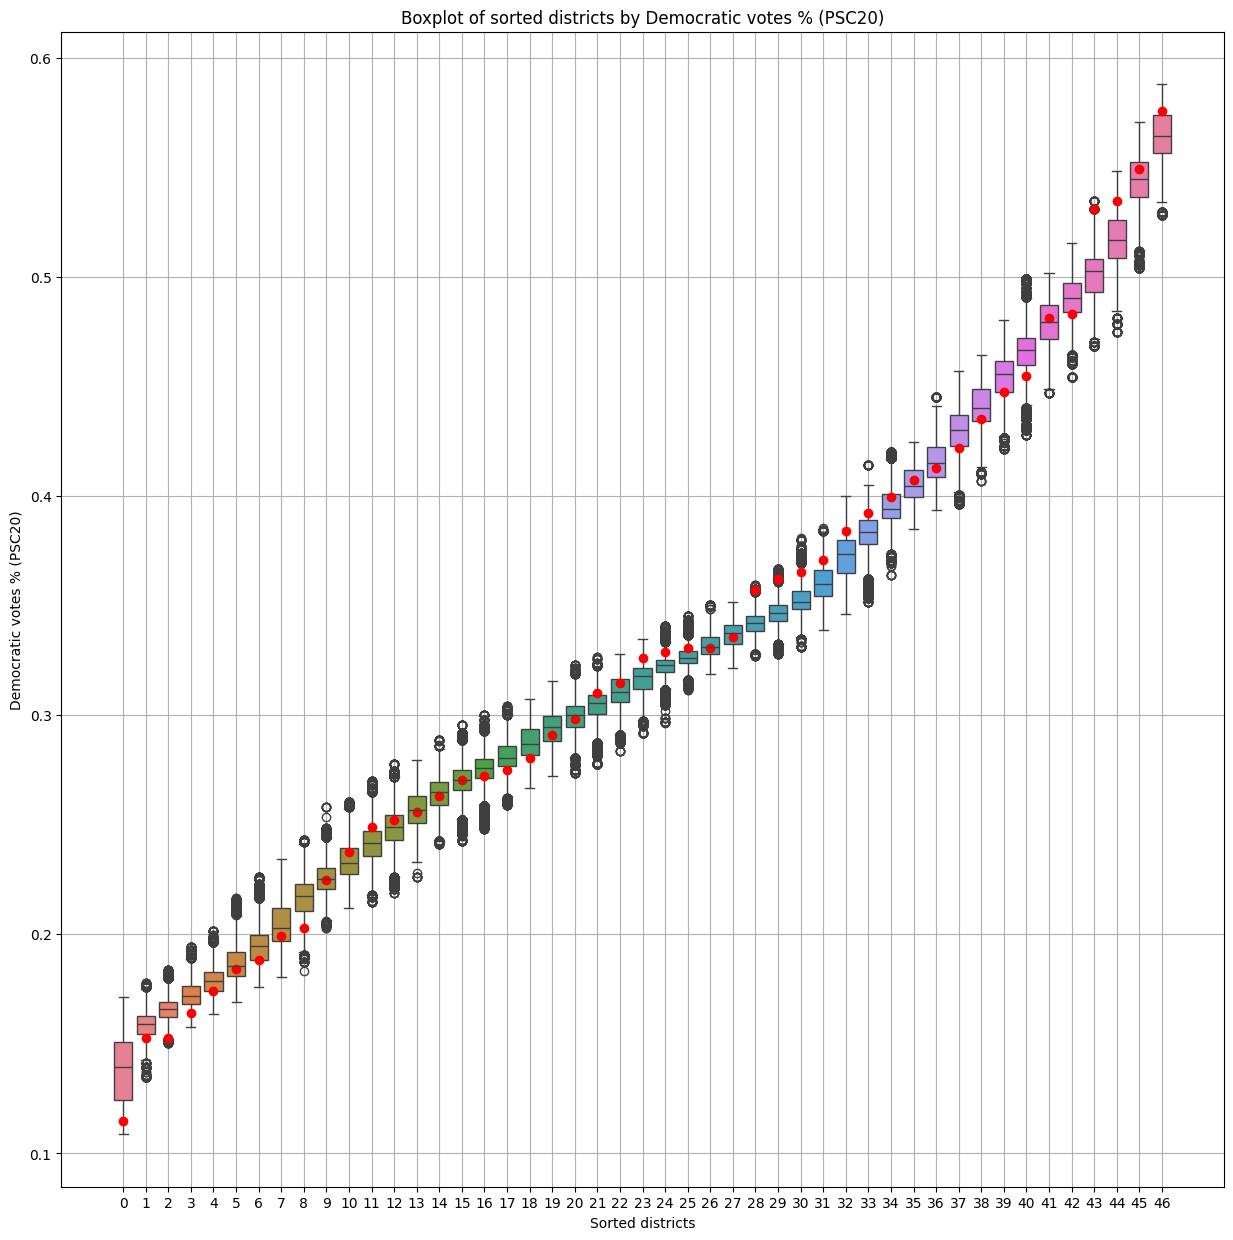

In [24]:
dem_election_votes_cols = [f'PSC20_Democratic_{i}' for i in range(1, 48)]
rep_election_votes_cols = [f'PSC20_Republican_{i}' for i in range(1, 48)]

sorted_voting_percents = df.apply(lambda row: sorted([row[dem_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Democratic votes % (PSC20)')
ax.set_title('Boxplot of sorted districts by Democratic votes % (PSC20)')
ax.grid(True)

# Display the plot
plt.show()

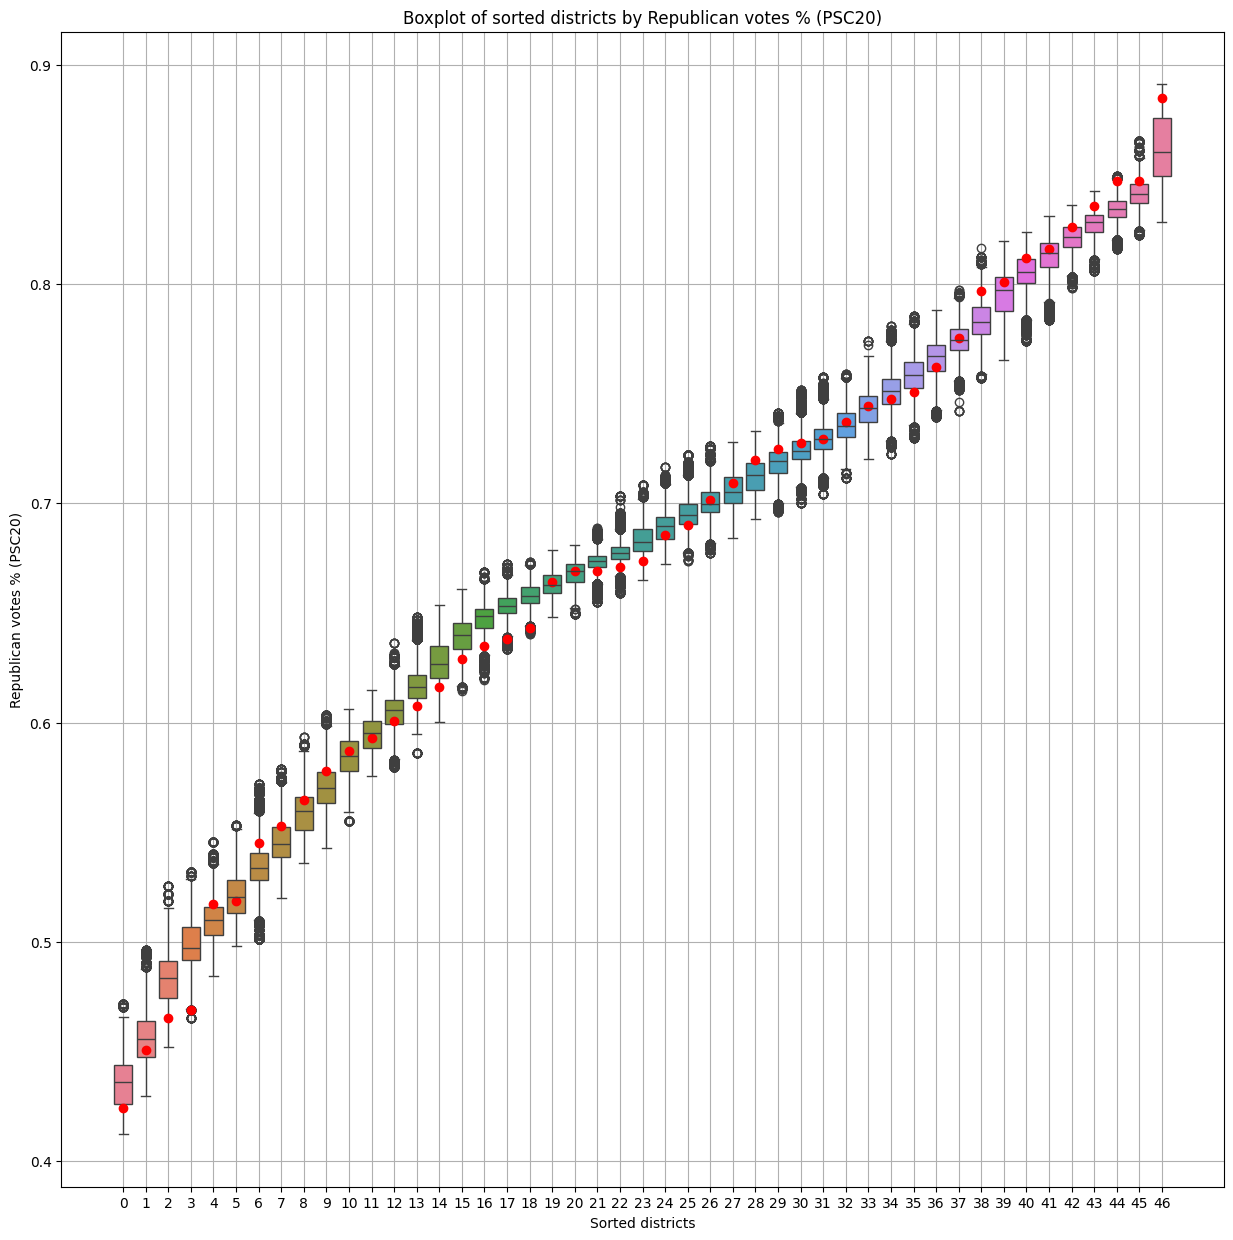

In [25]:
sorted_voting_percents = df.apply(lambda row: sorted([row[rep_election_votes_cols[i]]/(row[dem_election_votes_cols[i]] + row[rep_election_votes_cols[i]]) for i in range(47)]), axis=1)

sorted_percents_df = pd.DataFrame(sorted_voting_percents.tolist())

# Draw boxplot of sorted_percents_df using Seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=sorted_percents_df, ax=ax)

plt.plot(sorted_voting_percents.iloc[0], "ro")

# Set labels and title
ax.set_xlabel('Sorted districts')
ax.set_ylabel('Republican votes % (PSC20)')
ax.set_title('Boxplot of sorted districts by Republican votes % (PSC20)')
ax.grid(True)

# Display the plot
plt.show()